# TP 1 : Codes convolutifs

Dans ce TP, on souhaite implémenter les algorithmes d'encodage et de décodage de codes convolutifs.

Un code convolutif est formé d'un ensemble de $k$ **générateurs**. Chaque générateur est une suite finie de coefficients, qui peut être vue comme un polynôme, mais qu'on représentera ici par une liste de bits de longueur $r$. Pour simplifier l'implémentation, on supposera que tous les générateurs ont le même *degré*, c'est-à-dire qu'ils sont constitués du même nombre de bits $r$, et que les premiers et derniers bits de chaque générateurs sont égaux à $1$.

Un **message** à encoder est une suite de $n$ bits, où $n \ge 1$. Pour encoder un message, on fait passer successivement les bits du message dans un registre de taille $r$, et on calcule un bit de sortie pour chaque générateur. Si le registre est formé des bits $[a_1, a_2, \dots, a_r]$, et le générateur des bits $[g_1, g_2, \dots, g_r]$, alors le bit de sortie est
$$
    c = (a_1 \wedge g_1) \oplus (a_2 \wedge g_2) \oplus \cdots \oplus (a_r \wedge g_r)
$$
où $\wedge$ représente le "et" logique (le produit modulo 2) et $\oplus$ le "ou exclusif" logique (la somme modulo 2).





**Aide.** Quelques notions utiles de python :
* `a ^ b` représente le "ou exclusif" logique : mathématiquement $a \oplus b$
* `a & b` représente le "et" logique : mathématiquement $a \wedge b$

## Partie 1 : encodage et décodage sans erreur

**Question 1.-** Écrire une fonction `shift(x, register)`, qui prend en entrée un bit `x` et une liste `registre`, et qui effectue un décalage du registre, c'est-à-dire qui introduit le bit `x` en début de registre, en éliminant le dernier bit du registre.

Par exemple, si `register = [0, 1, 1, 1]` et `x = 1`,  alors la sortie doit être : `[1, 0, 1, 1]`.

In [1]:
# Testez votre fonction  

**Question 2.-** Écrire une fonction `compute_output(register, generator)` qui calcule la valeur de sortie du registre en fonction du générateur `generator`, fourni comme une liste de coefficients.

Par exemple, si `register = [0, 1, 1, 0]` et `generator = [1, 0, 1, 1]`, alors la sortie doit être :
$$
(0 \wedge 1) \oplus (1 \wedge 0)  \oplus (1 \wedge 1) \oplus (0 \wedge 1) = 1 
$$

In [2]:
# Testez votre fonction

**Question 3.-** Écrire la fonction `encode(message, generators)` d'encodage d'un code convolutif. Cette fonction prend en entrée une liste de $n$ bits nommée `message`, et une liste de $k$ générateurs `generators`.

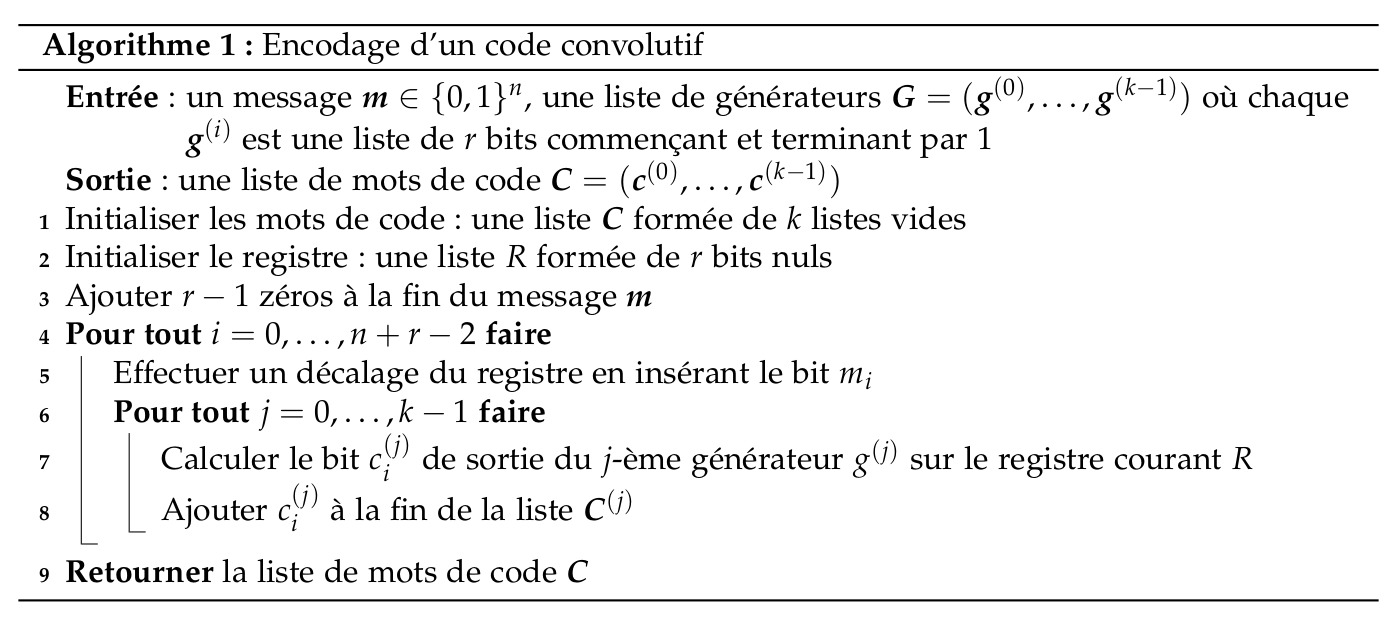

**Question 4.-** Tester la fonction `encode` avec les paramètres suivants.
* message `[1]` et générateurs `[ [1, 0, 1], [1, 1, 1] ]`
* message `[0, 1, 0, 1, 1, 1]` et générateurs `[ [1, 1, 0, 1], [1, 0, 1, 1] ]`

**Question 5.-** Écrire une fonction de décodage sans erreur `decode(codeword, generator)`, qui prend en entrée un mot de code `codeword`, et retourne le message qui a permis de créer ce mot de code via le générateur `generator`.

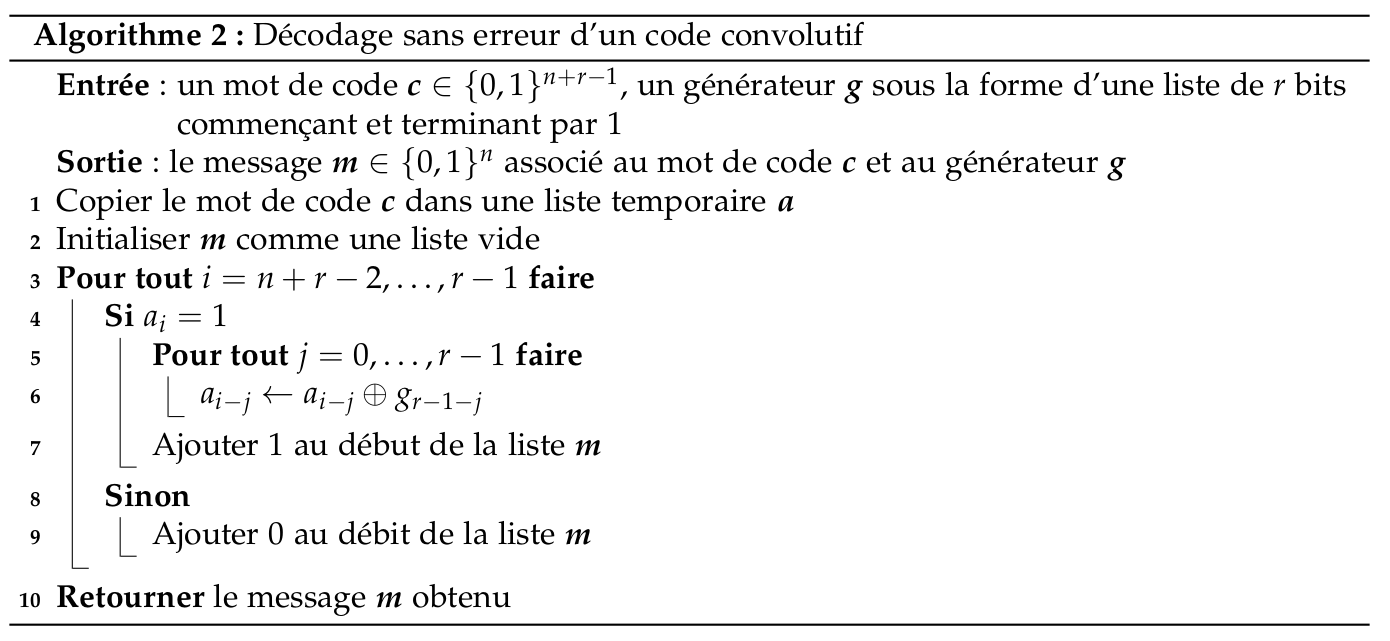

In [3]:
# Testez votre fonction

**Question 6.-** En créant des générateurs et des messages aléatoires, vérifier que `encode` et `decode` sont des fonctions inverses l'une de l'autre.

## Partie 2 : algorithme de Viterbi

Dans ce partie du TP, on souhaite implémenter l'algorithme de Viterbi vu en cours, qui permet de corrger des erreurs sur un message encodé par un code convolutif.

Avant de pouvoir corriger des erreurs, il faut savoir en introduire sur des mots de code. Pour cela, on adopte le modèle du canal binaire symétrique : pour chaque bit d'un mot de code, le canal modifie le bit avec probabilité $p \in [0, 1]$. 

**Question 7.-** Écrire une fonction `BSC(b, p)` qui modifie un bit `b` avec probabilité `p`.

In [4]:
# Testez votre fonction

**Question 8.-** Écrire une fonction `BSC_noise(codewords, p)` qui applique le canal binaire symétrique à chaque bit de chaque mot de `codewords`. La fonction doit retourner une nouvelle liste de mots erronés, sans modifier l'entrée `codewords`.

In [5]:
# Testez votre fonction

**Question 9.** Écrire une fonction `hamming(a, b, k)` qui calcule le poids de Hamming entre deux listes `a` et `b` de longueur `k`.   

In [6]:
# Testez votre fonction

On rappelle que l'algorithme de Viterbi est un algorithme de programmation dynamique, qui correspond à calculer un chemin le plus court dans un treillis.


**Fonctions auxiliaires.** Les trois fonctions suivantes vous seront utiles pour l'implémentation de l'algorithme de Viterbi.
* La fonction `binary_decomp(t, k)` prend en entrée un entier `t` encodé sur `k` bits et retourne son écriture binaire, c'est-à-dire la liste de ses coefficients dans sa décomposition en base $2$, du coefficients de poids fort au coefficients de poids faible.
* La fonction `create_PREV(m)` retourne une liste de $2^m$ couples, qui représentent les états précédents de l'état courant. Dans la liste, le couple d'indice $i$ est formé de deux entiers $(p_i[0], p_i[1])$, de sorte que $p_i[0]$ est d'indice de l'état qui mène à $i$ par la transition de bit $0$, et $p_i[1]$ est d'indice de l'état qui mène à $i$ par la transition de bit $1$. Dans la représentation par treillis, `create_PREV(m)` représente les flèches (en sens inverse).
* La fonction `create_OUT(m)` retourne une liste de $2^m$ paires de listes de taille $k$, qui représentent les sorties du registre à décalage. À l'indice $i$, on a deux listes $C_i[0]$ et $C_i[1]$, de sorte que la liste $C_i[j]$ correspond aux $k$ bits de mots de codes calculés lorsque le registre constitué du bit $j$ suivi des bits de l'état $i$.

In [7]:
def binary_decomp(t, k):
    return [ (t >> (k-1-i)) & 1 for i in range(k) ]

In [8]:
def create_PREV(m):
    TAB = []
    mask = (1 << m) - 1
    for i in range(2**m):
        prev_0 = (i << 1) & mask
        prev_1 = (i << 1 ^ 1) & mask
        TAB.append([prev_0, prev_1])
    return TAB
    
# create_PREV(3)

In [9]:
def create_OUT(generators):
    k = len(generators)
    m = len(generators[0])
    r = m-1
    TAB = []
    for state in range(2**r):
        TAB.append([[],[]])
        for j in range(2):
            register = [j] + binary_decomp(state, r)
            for i in range(k):
                TAB[state][j].append(compute_output(register, generators[i]))
                
    return TAB
    
# create_OUT([[1,1,0,1], [1,0,1,1]])

**Question 10.** Implanter l'algorithme de Viterbi. Un pseudo-code est proposé ci-dessous, mais il n'y a pas obligation de le suivre.

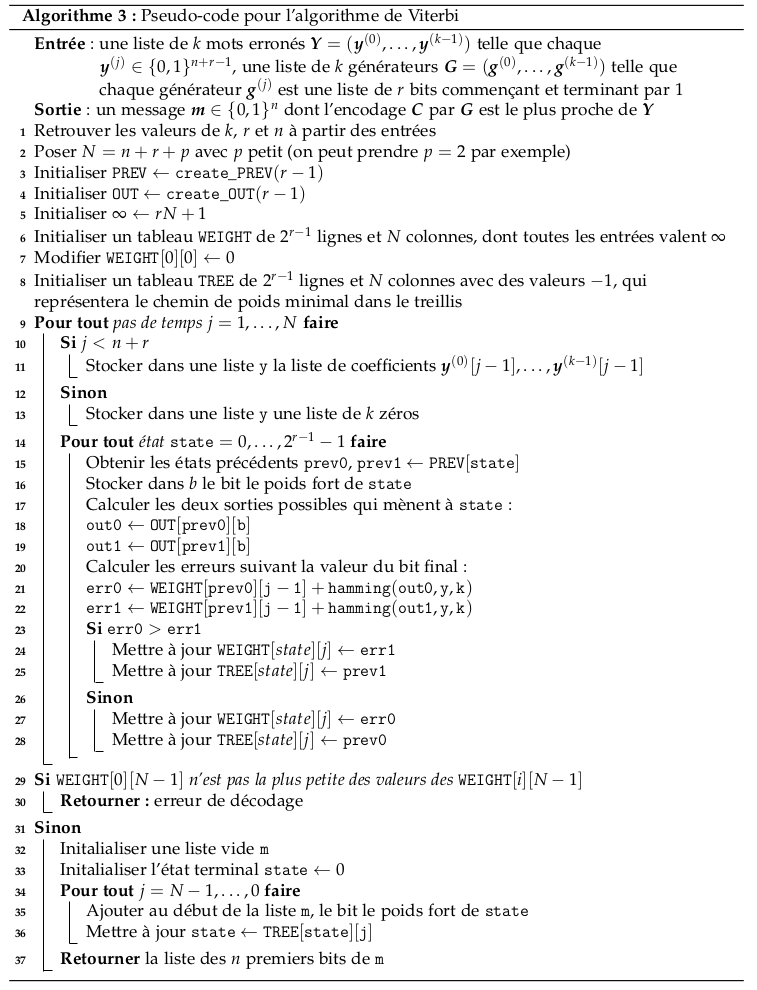

**Question 11.** Tester l'implantation avec les exemples des slides de cours, puis avec des mots encodés pour corrompus aléatoirement avec votre fonction `BSC_noise`. On prendra un petit parmètre d'erreur (ex: $0.1$).